# Classification problem trained on Google colaboratory online GPU

In [0]:
import os

In [2]:
# check current directory
os.getcwd()

'/content'

In [4]:
os.listdir('/content/fruits_data')

['fruits-360_dataset_2018_02_08.zip']

In [0]:
os.chdir('fruits_data')

In [6]:
os.getcwd()

'/content/fruits_data'

In [7]:
# upload the files
from google.colab import files
uploaded = files.upload()

Saving fruits-360_dataset_2018_02_08.zip to fruits-360_dataset_2018_02_08 (1).zip


In [9]:
# save uploaded file
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print("saved file", name)

saved file fruits-360_dataset_2018_02_08.zip


In [10]:
# check uploaded file in the directory
os.listdir('/content/fruits_data')

['fruits-360_dataset_2018_02_08.zip', 'fruits-360_dataset_2018_02_08 (1).zip']

In [0]:
# unzip the fruits zip file
import zipfile
path_to_zip_file = 'fruits-360_dataset_2018_02_08.zip'
directory_to_extract_to = ''
zip_ref = zipfile.ZipFile(path_to_zip_file, 'r')
zip_ref.extractall(directory_to_extract_to)
zip_ref.close()

In [13]:
os.listdir('/content/fruits_data')

['fruits-360_dataset_2018_02_08.zip',
 'fruits-360_dataset_2018_02_08 (1).zip',
 'fruits-360']

In [14]:
import numpy as np 
import pandas as pd
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import glob
import os

Using TensorFlow backend.


In [20]:
os.getcwd()

'/content/fruits_data'

In [0]:
# load training data and label it
# Resize all the data
training_fruit_img = []
training_label = []
for dir_path in glob.glob("./fruits-360/Training/*"):
    img_label = dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        image = cv2.imread(image_path,cv2.IMREAD_COLOR)
        image = cv2.resize(image, (64, 64))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        training_fruit_img.append(image)
        training_label.append(img_label)
training_fruit_img = np.array(training_fruit_img)
training_label = np.array(training_label)

In [0]:
label_to_id = {v:k for k,v in enumerate(np.unique(training_label)) }
id_to_label = {v:k for k,v in label_to_id.items() }

In [23]:
id_to_label
len(training_label)

28736

In [24]:
training_label_id = np.array([label_to_id[i] for i in training_label])
training_label_id

array([53, 53, 53, ..., 35, 35, 35])

In [25]:
training_fruit_img.shape,training_label_id.shape

((28736, 64, 64, 3), (28736,))

In [0]:
# load validation data
# resize the data
validation_fruit_img=[]
validation_label =[]
for dir_path in glob.glob("./fruits-360/Validation/*"):
    img_label = dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        image = cv2.imread(image_path,cv2.IMREAD_COLOR)
        image = cv2.resize(image, (64, 64))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        validation_fruit_img.append(image)
        validation_label.append(img_label)
validation_fruit_img = np.array(validation_fruit_img)
validation_label = np.array(validation_label)

In [0]:
label_to_val_id = {v:k for k,v in enumerate(np.unique(validation_label)) }
val_id_to_label = {v:k for k,v in label_to_val_id.items() }

In [0]:
validation_label_id = np.array([label_to_val_id[i] for i in validation_label])

In [29]:
validation_fruit_img.shape,validation_label_id.shape

((9673, 64, 64, 3), (9673,))

In [30]:
X_train,X_test = training_fruit_img,validation_fruit_img
Y_train,Y_test =training_label_id,validation_label_id

X_train = X_train/255
X_test = X_test/255

X_flat_train = X_train.reshape(X_train.shape[0],64*64*3)
X_flat_test = X_test.reshape(X_test.shape[0],64*64*3)

#One Hot Encode the Output
Y_train = keras.utils.to_categorical(Y_train, 60)
Y_test = keras.utils.to_categorical(Y_test, 60)

print('Original Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print('Flattened sizes:', X_flat_train.shape, X_flat_test.shape)

Original Sizes: (28736, 64, 64, 3) (9673, 64, 64, 3) (28736, 60) (9673, 60)
Flattened: (28736, 12288) (9673, 12288)


(64, 64, 3)


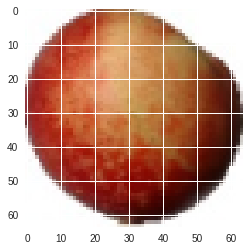

In [31]:
# show train image
print(X_train[1200].shape)
plt.imshow(X_train[1200])
plt.show()

In [0]:
# import library
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,Activation,BatchNormalization
from keras.optimizers import Adamax
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K

In [49]:
# CNN model structure with 3-layers
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=(64,64,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256,activation='elu'))
#model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))
model.add(Dense(60))
model.add(Activation("softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 64, 64, 16)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
__________

In [51]:
# compile the model
model.compile(loss='categorical_crossentropy',
             optimizer = Adamax(),
             metrics=['accuracy'])
# fit the model into training data
model.fit(X_train,
          Y_train,
          batch_size=128,
          epochs=10,
          verbose=1
         )

Epoch 1/10
28736/28736 [==============================] - 16s 566us/step - loss: 0.0236 - acc: 0.9922
Epoch 2/10
28736/28736 [==============================] - 15s 527us/step - loss: 0.0158 - acc: 0.9952
Epoch 3/10
10624/28736 [==========>...................] - ETA: 9s - loss: 0.0168 - acc: 0.994828736/28736 [==============================] - 15s 531us/step - loss: 0.0152 - acc: 0.9955
Epoch 4/10
28736/28736 [==============================] - 15s 529us/step - loss: 0.0107 - acc: 0.9968
Epoch 5/10
16000/28736 [===============>..............] - ETA: 6s - loss: 0.0128 - acc: 0.995928736/28736 [==============================] - 15s 529us/step - loss: 0.0135 - acc: 0.9957
Epoch 6/10
28736/28736 [==============================] - 15s 528us/step - loss: 0.0067 - acc: 0.9980
Epoch 7/10
16896/28736 [================>.............] - ETA: 6s - loss: 0.0058 - acc: 0.998528736/28736 [==============================] - 15s 525us/step - loss: 0.0076 - acc: 0.9976
Epoch 8/10
28736/28736 [=============

In [52]:
# Evaluate the model on the testing data
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14475693050049215
Test accuracy: 0.9493435335469864


In [0]:
# We got testing accuracy 94.93